# project 1 mnist  number classification

In [3]:
import tensorflow as tf
if tf.__version__<'2.0.0':
    !pip install --upgrade tensorflow_gpu==2.0
print(tf.__version__)    

2.0.0


# STEP 1 : Loading Data¶
The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.

x_train and x_test parts contain greyscale RGB codes (from 0 to 255) .

y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.

In [4]:
#gray scale image always towards 0 or 255 means 
#Typically zero is taken to be black, and 255 is taken to be white.

In [7]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [21]:
y_train.shape

(60000,)

In [22]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [23]:
y_test.shape

(10000,)

In [24]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
y_train.shape#laebl

(60000,)

In [11]:
x_train.ndim

3

# STEP 2 : DATA PREPROCESSING
#here we are converting  value to 0 or 1  by dividing each valye by 255 bcz max range of pixel is 255
#we wpuld nt divide y  bcs its label betwen o and 10
(x_train),(x_test)=x_train/255.0,x_test/255.0


In [25]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [26]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# STEP 3 : BUILD NEURAL NETWORK MODEL
""""here we are using model which is sequential by  tensorflow library keras is embaded in tensorflow
model is sequential becaue every output of each node of same layer would  be th input of next  layer of node(not same layer of node) so thats sequential"""
#flatten for converting on to one dimension 28*28 =784 is input means  each image contain 784 pixel""" 
model

In [27]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'), #hideen layer has 128 nodes(neurons)
  tf.keras.layers.Dropout(0.2),#for remove overfitted
  tf.keras.layers.Dense(10, activation='softmax')#10is last layer nuurons(nodes means we would have 10 output 10 nodes or 10 neurons)
                                    ])

# STEP 4 : COMPILATION
#compilation


In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# STEP 5 : TRAIN THE MODEL
#train model
model.fit(x_train, y_train, epochs=4 )

In [29]:
model.fit(x_train, y_train, epochs=4 )

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 6s 93us/sample - loss: 2.5007 - accuracy: 0.7521
Epoch 2/4
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5985 - accuracy: 0.8406
Epoch 3/4
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4929 - accuracy: 0.8684
Epoch 4/4
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4392 - accuracy: 0.8849


# STEP 6 : EVALUATE THE TRAINING
#STEP 6 : EVALUATE THE TRAINING
#Now let’s check that the model performs well on the test set, too:
evaluation = model.evaluate(x_test, y_test, verbose=2)   

In [30]:
evaluation = model.evaluate(x_test, y_test, verbose=2)
print(evaluation[0])   #test loss
print(evaluation[1])   #test accuracy

10000/1 - 0s - loss: 0.2066 - accuracy: 0.9245
0.3100173287410289
0.9245


# STEP 7  : PREDICTION
#prediction
import matplotlib.pyplot as plt
plt.imshow(x_test[90],cmap='Greys')#im show method convert  binary value in to image 
model.predict_classes(x_test[90].reshape(1, 28, 28 ))#here we are reflattening the image because we need ot show the  value #class means it give specive valuw whc is called class



array([3], dtype=int64)

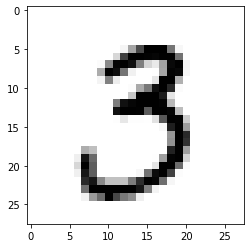

In [33]:
import matplotlib.pyplot as plt
plt.imshow(x_test[90],cmap='Greys')
model.predict_classes(x_test[90].reshape(1, 28, 28 ))

In [32]:
#verbose
""""By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

progres_bar

verbose=2 will just mention the number of epoch like this:

enter image description here"""

'"By setting verbose 0, 1 or 2 you just say how do you want to \'see\' the training progress for each epoch.\n\nverbose=0 will show you nothing (silent)\n\nverbose=1 will show you an animated progress bar like this:\n\nprogres_bar\n\nverbose=2 will just mention the number of epoch like this:\n\nenter image description here'